In [1]:
import sys
import os

# Add the parent folder (project root) to sys.path
sys.path.append(os.path.abspath(".."))


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch daily Bitcoin price from 2017-01-01 to today
btc = yf.download("BTC-USD", start="2017-01-01")

# Save to CSV
btc.to_csv("../data/bitcoin_price.csv")

# Show a preview
btc.head()



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008


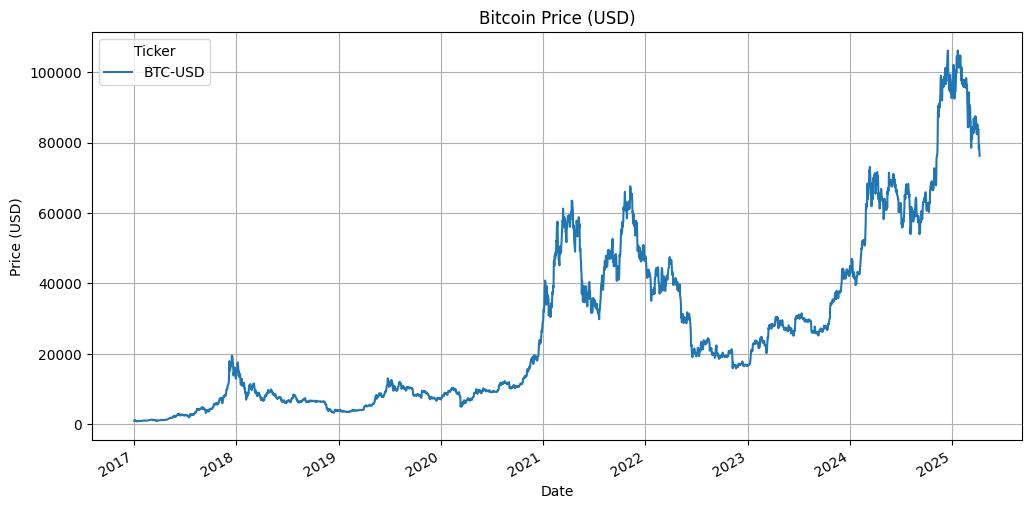

In [3]:
btc['Close'].plot(figsize=(12, 6), title="Bitcoin Price (USD)")
plt.ylabel("Price (USD)")
plt.grid()
plt.show()


In [7]:
btc = pd.read_csv('../data/bitcoin_price.csv', skiprows=[1, 2])
btc = btc.rename(columns={"Price": "Date"})
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
btc.head()

btc.to_csv('../data/bitcoin_price_clean.csv', index=False)


#### Download BlockChain Metric Data

In [ ]:
from src.data_loader import download_blockchain_metric

hashrate_df = download_blockchain_metric('hash-rate', 'hashrate')
difficulty_df = download_blockchain_metric('difficulty', 'difficulty')
volume_df = download_blockchain_metric('output-volume', 'transaction_volume')


In [8]:

# Load all CSVs
price_df = pd.read_csv('../data/bitcoin_price_clean.csv', parse_dates=['Date'])
hashrate_df = pd.read_csv('../data/hashrate.csv', parse_dates=['Date'])
difficulty_df = pd.read_csv('../data/difficulty.csv', parse_dates=['Date'])
tx_volume_df = pd.read_csv('../data/transaction_volume.csv', parse_dates=['Date'])

# Merge all on 'Date'
merged_df = price_df.merge(hashrate_df, on='Date', how='inner') \
                    .merge(difficulty_df, on='Date', how='inner') \
                    .merge(tx_volume_df, on='Date', how='inner')

# Sort by date and drop missing values if any
merged_df = merged_df.sort_values('Date').dropna()

# Save to CSV
merged_df.to_csv('../data/merged_btc_blockchain.csv', index=False)

merged_df.head()


,Date,Open,High,Low,Close,Volume,hash-rate,difficulty,output-volume
0,2020-04-11,6867.440430,6926.069824,6789.920898,6859.083008,31222085946,1.163081e+08,1.471521e+13,608915.365841
1,2020-04-12,6858.067871,7119.947266,6811.078125,6971.091797,35759567632,1.119191e+08,1.471521e+13,494233.050258
2,2020-04-13,6965.616699,6965.616699,6668.259766,6845.037598,38619308647,1.250860e+08,1.471521e+13,985586.612083
3,2020-04-14,6843.281738,6958.557129,6793.821289,6842.427734,34110434052,1.228915e+08,1.471521e+13,773028.957715
4,2020-04-15,6845.561523,6928.664551,6633.402832,6642.109863,32288311031,1.236230e+08,1.471521e+13,877779.734541


In [6]:
price_df = pd.read_csv('../data/bitcoin_price.csv')

print(price_df.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
